# Flights Data Exploration

## Preliminary Wrangling
> This dataset reports flights in the United States, including carriers, arrival and departure delays, and reasons for delays,
for 2008.

#### Variable descriptions
| --- | **Name** | **Description** |
| --- | --- | --- |
| 1 | Year | 2008 |
| 2 | Month | 1-12 |
| 3	| DayofMonth | 1-31 |
| 4 | DayOfWeek	| 1 (Monday) - 7 (Sunday) |
| 5	| DepTime | actual departure time (local, hhmm) |
| 6	| CRSDepTime | scheduled departure time (local, hhmm) |
| 7	| ArrTime | actual arrival time (local, hhmm) |
| 8	| CRSArrTime | scheduled arrival time (local, hhmm) |
| 9	| UniqueCarrier | unique carrier code |
| 10 | FlightNum | flight number |
| 11 | TailNum | plane tail number |
| 12 | ActualElapsedTime | in minutes |
| 13 | CRSElapsedTime | in minutes |
| 14 | AirTime | in minutes |
| 15 | ArrDelay | arrival delay, in minutes |
| 16 | DepDelay | departure delay, in minutes |
| 17 | Origin | origin IATA airport code |
| 18 | Dest | destination IATA airport code |
| 19 | Distance | in miles |
| 20 | TaxiIn | taxi in time, in minutes |
| 21 | TaxiOut | taxi out time in minutes |
| 22 | Cancelled | was the flight cancelled? |
| 23 | CancellationCode | reason for cancellation (A = carrier, B = weather, C = NAS, D = security) |
| 24 | Diverted | 1 = yes, 0 = no |
| 25 | CarrierDelay | in minutes |
| 26 | WeatherDelay | in minutes |
| 27 | NASDelay | in minutes |
| 28 | SecurityDelay | in minutes |
| 29 | LateAircraftDelay | in minutes |

In [6]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
import calendar

%matplotlib inline

In [7]:
# load 2008 dataset into a pandas dataframe, print statistics.
df_2008s = pd.read_csv('2008.csv')

In [4]:
print(df_2008s.shape)

(7009728, 29)


In [140]:
# Due to size of data set, we will initially use a sample of the data sets to find issues with the data.
#df_2008.sample(10000).to_csv('sampled_10000.csv')

In [7]:
#df_2008s = pd.read_csv('sampled_10000.csv')

In [142]:
#df_2008s.shape

(10000, 30)

In [5]:
# check data types of each column
df_2008s.dtypes

Year                   int64
Month                  int64
DayofMonth             int64
DayOfWeek              int64
DepTime              float64
CRSDepTime             int64
ArrTime              float64
CRSArrTime             int64
UniqueCarrier         object
FlightNum              int64
TailNum               object
ActualElapsedTime    float64
CRSElapsedTime       float64
AirTime              float64
ArrDelay             float64
DepDelay             float64
Origin                object
Dest                  object
Distance               int64
TaxiIn               float64
TaxiOut              float64
Cancelled              int64
CancellationCode      object
Diverted               int64
CarrierDelay         float64
WeatherDelay         float64
NASDelay             float64
SecurityDelay        float64
LateAircraftDelay    float64
dtype: object

In [6]:
# visually assess the data set.
df_2008s.head(10)

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiIn,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,4.0,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,5.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,3.0,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,3.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,3.0,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,4.0,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,3.0,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,7.0,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,6.0,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,3.0,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN


In [145]:
# describe data set to further analyze the data
df_2008s.describe()

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,FlightNum,ActualElapsedTime,...,Distance,TaxiIn,TaxiOut,Cancelled,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
count,7009728.0,7.009728e+06,7.009728e+06,7.009728e+06,6.873482e+06,7.009728e+06,6.858079e+06,7.009728e+06,7.009728e+06,6.855029e+06,...,7.009728e+06,6.858079e+06,6.872670e+06,7.009728e+06,7.009728e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06,1.524735e+06
mean,2008.0,6.375130e+00,1.572801e+01,3.924182e+00,1.333830e+03,1.326086e+03,1.481258e+03,1.494801e+03,2.224200e+03,1.273224e+02,...,7.263870e+02,6.860852e+00,1.645305e+01,1.960618e-02,2.463006e-03,1.577206e+01,3.039031e+00,1.716462e+01,7.497434e-02,2.077098e+01
std,0.0,3.406737e+00,8.797068e+00,1.988259e+00,4.780689e+02,4.642509e+02,5.052251e+02,4.826728e+02,1.961716e+03,7.018731e+01,...,5.621018e+02,4.933649e+00,1.133280e+01,1.386426e-01,4.956753e-02,4.009912e+01,1.950287e+01,3.189495e+01,1.837940e+00,3.925964e+01
min,2008.0,1.000000e+00,1.000000e+00,1.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,0.000000e+00,1.000000e+00,1.200000e+01,...,1.100000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
25%,2008.0,3.000000e+00,8.000000e+00,2.000000e+00,9.280000e+02,9.250000e+02,1.107000e+03,1.115000e+03,6.220000e+02,7.700000e+01,...,3.250000e+02,4.000000e+00,1.000000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00
50%,2008.0,6.000000e+00,1.600000e+01,4.000000e+00,1.325000e+03,1.320000e+03,1.512000e+03,1.517000e+03,1.571000e+03,1.100000e+02,...,5.810000e+02,6.000000e+00,1.400000e+01,0.000000e+00,0.000000e+00,0.000000e+00,0.000000e+00,6.000000e+00,0.000000e+00,0.000000e+00
75%,2008.0,9.000000e+00,2.300000e+01,6.000000e+00,1.728000e+03,1.715000e+03,1.909000e+03,1.907000e+03,3.518000e+03,1.570000e+02,...,9.540000e+02,8.000000e+00,1.900000e+01,0.000000e+00,0.000000e+00,1.600000e+01,0.000000e+00,2.100000e+01,0.000000e+00,2.600000e+01
max,2008.0,1.200000e+01,3.100000e+01,7.000000e+00,2.400000e+03,2.359000e+03,2.400000e+03,2.400000e+03,9.743000e+03,1.379000e+03,...,4.962000e+03,3.080000e+02,4.290000e+02,1.000000e+00,1.000000e+00,2.436000e+03,1.352000e+03,1.357000e+03,3.920000e+02,1.316000e+03


### What is the structure of your dataset?
>There are 7,009,728 flights in this dataset with 25 features (Year, Month, Day of Month, Day Of Week, Actual Departure Time, Scheduled Departure Time, Actual Arrival Time, Scheduled Arrival Time, Unique Carrier Code, Flight Number, Plane Tail Number, Actual Elapsed Time, Scheduled Elapsed Time, Air Time, Arrival Delay, Departure Delay, Origin, Destination, Distance, Taxi in time, Taxi Out Time, Cancelled, Reason For Cancellation (A = carrier, B = weather, C = NAS, D = security),	Diverted, Carrier Delay, Weather Delay, NAS Delay, Security Delay, Late Aircraft Delay.	

### What is/are the main feature(s) of interest in your dataset?
>I am most interested in figuring out what features are best for predicting the likelihood a flight is delayed or cancelled. I am also interested in the proportion of delays and cancellations for day of week and month of year. 

### What features in the dataset do you think will help support your investigation into your feature(s) of interest?
I expect that weather delays and number of flights will have the strongest effect on delay or cancellation. This means that the **CancellationCode** column and each of the delay columns will be of interest. To calculate the number of flights, I plan to use the `.value_counts()` on the **Month** and **DayOfWeek** columns.

## Univariate Exploration

#### Make sure that I am converting numbers to days/months correctly.

In [7]:
days = list(calendar.day_name)
days_abbr = list(calendar.day_abbr)
print(days, days_abbr)
month = list(calendar.month_name)
month_abbr = list(calendar.month_abbr)
print(month, month_abbr)
print(calendar.month_abbr[1])
exit()

['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday'] ['Mon', 'Tue', 'Wed', 'Thu', 'Fri', 'Sat', 'Sun']
['', 'January', 'February', 'March', 'April', 'May', 'June', 'July', 'August', 'September', 'October', 'November', 'December'] ['', 'Jan', 'Feb', 'Mar', 'Apr', 'May', 'Jun', 'Jul', 'Aug', 'Sep', 'Oct', 'Nov', 'Dec']
Jan


#### Total Flights by Month

In [8]:
# create new data set based on Month value counts
df_2008s_month_value_counts = df_2008s.Month.value_counts().reset_index()
df_2008s_month_value_counts.columns = ["Month", "Total_Flights"]
df_2008s_month_value_counts = df_2008s_month_value_counts.sort_values(by=['Month'])
df_2008s_month_value_counts['Month'] = df_2008s_month_value_counts['Month'].apply(lambda x: calendar.month_abbr[x])
print(df_2008s_month_value_counts)
df_flights_by_month = df_2008s_month_value_counts.reset_index()
df_flights_by_month = df_flights_by_month.drop(columns=['index'])
df_flights_by_month

   Month  Total_Flights
5    Jan         605765
7    Feb         569236
1    Mar         616090
6    Apr         598126
4    May         606293
3    Jun         608665
0    Jul         627931
2    Aug         612279
10   Sep         540908
8    Oct         556205
11   Nov         523272
9    Dec         544958


,Month,Total_Flights
0,Jan,605765
1,Feb,569236
2,Mar,616090
3,Apr,598126
4,May,606293
5,Jun,608665
6,Jul,627931
7,Aug,612279
8,Sep,540908
9,Oct,556205


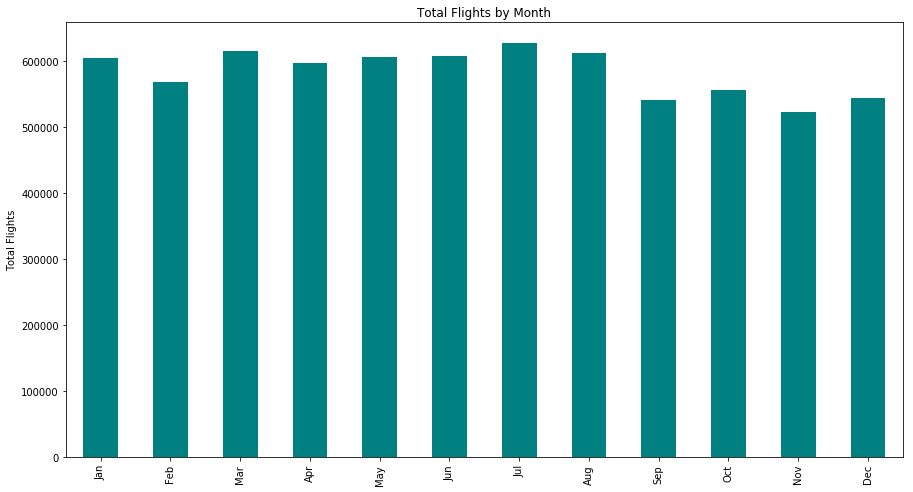

In [9]:
# Plot
ax = df_2008s_month_value_counts.plot(kind='bar', x='Month', y='Total_Flights', color = 'teal', legend=False, figsize= (15,8))
plt.xticks(range(0,12),df_2008s_month_value_counts["Month"])
plt.title("Total Flights by Month")
plt.ylabel("Total Flights")
plt.xlabel("")
plt.show();

>Most flights occur in the months of July and August. The months that had the least flights are in the months between September and December.

#### Total Flights by Day of Week

In [10]:
# create new data set based on DayOfWeek value counts
df_2008s_day_value_counts = df_2008s.DayOfWeek.value_counts().reset_index()
df_2008s_day_value_counts.columns = ["DayOfWeek", "Total_Flights"]
df_2008s_day_value_counts = df_2008s_day_value_counts.sort_values(by=['DayOfWeek'])
df_2008s_day_value_counts['DayOfWeek'] = df_2008s_day_value_counts['DayOfWeek'].apply(lambda x: calendar.day_abbr[x-1])
print(df_2008s_day_value_counts)
df_day_value_counts = df_2008s_day_value_counts.reset_index()
df_day_value_counts = df_day_value_counts.drop(columns=['index'])
df_day_value_counts

  DayOfWeek  Total_Flights
1       Mon        1036201
4       Tue        1032049
0       Wed        1039665
3       Thu        1032224
2       Fri        1035166
6       Sat         857536
5       Sun         976887


,DayOfWeek,Total_Flights
0,Mon,1036201
1,Tue,1032049
2,Wed,1039665
3,Thu,1032224
4,Fri,1035166
5,Sat,857536
6,Sun,976887


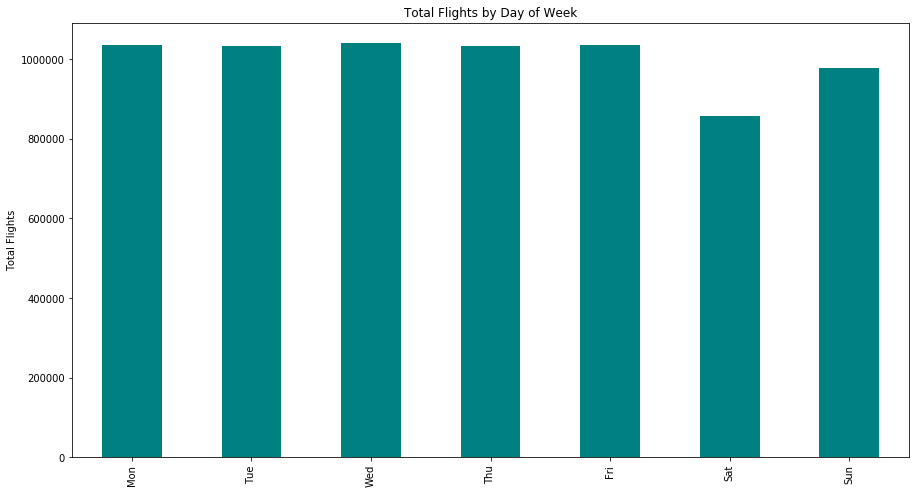

In [11]:
# Plot
ax = df_2008s_day_value_counts.plot(kind='bar', x='DayOfWeek', y='Total_Flights', color = 'teal', legend=False, figsize = (15,8))
plt.xticks(range(0,7),df_2008s_day_value_counts["DayOfWeek"])
plt.title("Total Flights by Day of Week")
plt.ylabel("Total Flights")
plt.xlabel("")
plt.show;

>Most flights occur on Wednesdays. Saturdays have the least number of flights.

#### Total Flights by Day of Year

In [12]:
# create date column
df_dvc2 = df_2008s
df_dvc2['Date']=df_dvc2['Year'].astype(str)+'/'+df_dvc2['Month'].astype(str)+'/'+df_dvc2['DayofMonth'].astype(str)
df_dvc2 = df_dvc2.Date.value_counts().reset_index()
df_dvc2.columns = ["Day", "Total_Flights"]
df_dvc2['Date'] = pd.to_datetime(df_dvc2['Day'], format='%Y/%m/%d')
df_dvc2 = df_dvc2.sort_values(by=['Day'])
print(df_dvc2)

           Day  Total_Flights       Date
200   2008/1/1          19187 2008-01-01
128  2008/1/10          20305 2008-01-10
118  2008/1/11          20349 2008-01-11
337  2008/1/12          16572 2008-01-12
205  2008/1/13          18947 2008-01-13
142  2008/1/14          20178 2008-01-14
187  2008/1/15          19504 2008-01-15
171  2008/1/16          19768 2008-01-16
134  2008/1/17          20277 2008-01-17
119  2008/1/18          20348 2008-01-18
340  2008/1/19          16255 2008-01-19
19    2008/1/2          20954 2008-01-02
243  2008/1/20          18653 2008-01-20
150  2008/1/21          20133 2008-01-21
186  2008/1/22          19505 2008-01-22
170  2008/1/23          19771 2008-01-23
138  2008/1/24          20258 2008-01-24
124  2008/1/25          20314 2008-01-25
339  2008/1/26          16282 2008-01-26
208  2008/1/27          18922 2008-01-27
144  2008/1/28          20149 2008-01-28
188  2008/1/29          19498 2008-01-29
22    2008/1/3          20937 2008-01-03
172  2008/1/30  

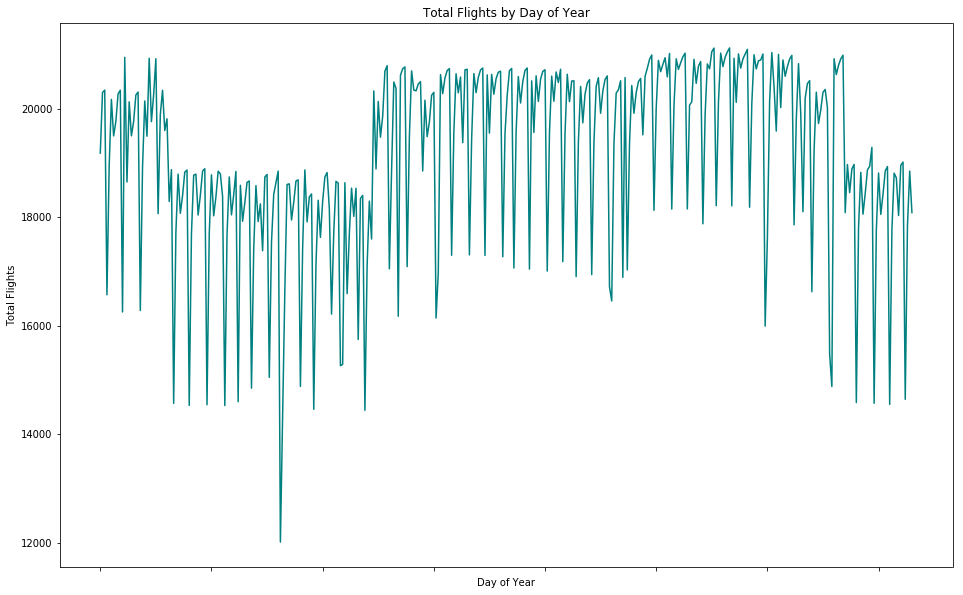

In [13]:
# Plot
df_dvc2.plot(kind='line', x='Day', y='Total_Flights', color = 'teal', legend=False, figsize = (16,10))
plt.title("Total Flights by Day of Year")
plt.ylabel("Total Flights")
plt.xlabel("Day of Year")
plt.show();

> Flight frequency fluctuates on a day by day basis. However, flights appear to be more frequent from around late spring to early winter. 

#### Percentage of Flights that are Cancelled

In [6]:
# find all unique entries in 'Cancelled' column
df_2008s.Cancelled.unique()

array([0, 1])

In [14]:
# create data set with 'Cancelled' value counts
df_cancelled = df_2008s['Cancelled'].value_counts()
df_cancelled = df_cancelled.reset_index()
df_cancelled

,index,Cancelled
0,0,6872294
1,1,137434


In [15]:
# Calculate percent of flight cancellations
cancelled_percent = df_cancelled.Cancelled[1] / (df_cancelled.Cancelled[0] + df_cancelled.Cancelled[1]) * 100
cancelled_percent = str(round(cancelled_percent, 2)) + "%"
cancelled_percent

'1.96%'

In [16]:
not_cancelled_percent = df_cancelled.Cancelled[0] / (df_cancelled.Cancelled[0] + df_cancelled.Cancelled[1]) * 100
not_cancelled_percent = str(round(not_cancelled_percent, 2)) + "%"
not_cancelled_percent

'98.04%'

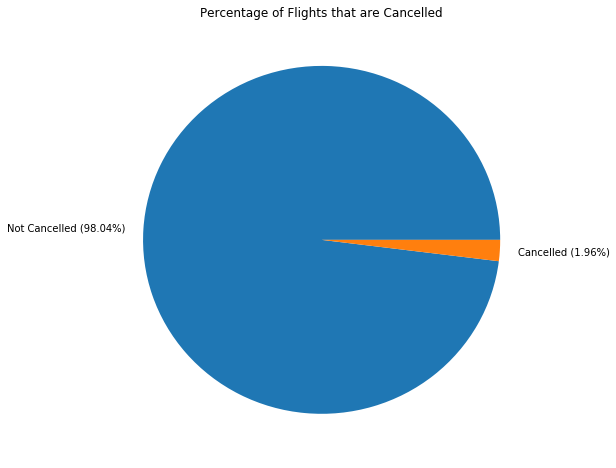

In [17]:
# Plot
df_cancelled.Cancelled.plot(kind= 'pie', labels = ['Not Cancelled (' + not_cancelled_percent + ')', 'Cancelled (' + cancelled_percent + ')'], figsize=(8,8))
plt.title("Percentage of Flights that are Cancelled")
plt.ylabel("");

>1.96% of all flights are cancelled. That is almost two flights per one hundred.

#### Causes of Flight Cancellations

In [17]:
# Mean Cancellations
df_2008s.Cancelled.mean()

0.019606181580797428

In [18]:
# Cancellations by Cancellation Code
df_2008s['CancellationCode'].value_counts()

B    54904
A    54330
C    28188
D       12
Name: CancellationCode, dtype: int64

In [19]:
# Replace codes with cause of cancellation
df_2008s['CancellationCode'].replace({'A': 'carrier', 'B': 'weather', 'C': 'NAS', 'D': 'security'}, inplace = True)

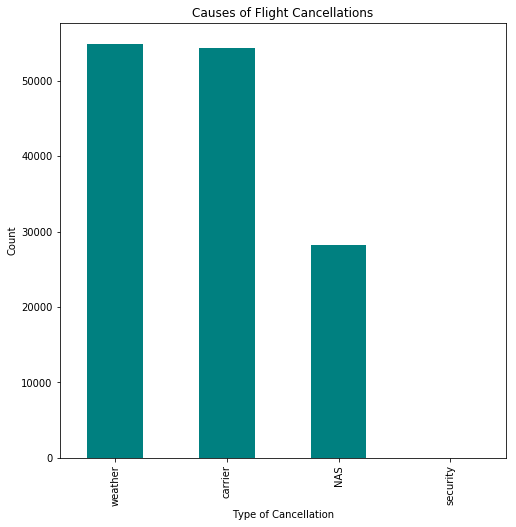

In [21]:
# A = carrier, B = weather, C = NAS, D = security
df_2008s['CancellationCode'].value_counts().plot(kind= 'bar', color = 'teal', figsize=(8,8))
plt.title("Causes of Flight Cancellations")
plt.ylabel("Count")
plt.xlabel("Type of Cancellation")
plt.show();

>The most common cause of flight cancellations is weather, followed closely by carrier delays. There are only 12 flights cancelled due to security.

#### Length of Carrier Delays 

In [22]:
# Query 'CarrierDelay' to only select entries that are neither NaN or 0.
df_cd_1 = df_2008s.query('CarrierDelay != "NaN"')
df_cd_1 = df_cd_1.query('CarrierDelay != "0.0"')
df_cd_1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,2008/1/3
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0,2008/1/3
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3


In [22]:
df_cd_1.describe().CarrierDelay

count    670622.000000
mean         35.859571
std          54.180292
min           1.000000
25%           9.000000
50%          19.000000
75%          41.000000
max        2436.000000
Name: CarrierDelay, dtype: float64

In [23]:
# Create bins of carrier delay lengths using information from the cell above.
bin_edges = [1, 9, 19, 41, 2436]
bin_names = ['1-8', '9-18', '19-39', '40-1951']
df_cd_1['CDGroup'] = pd.cut(df_cd_1['CarrierDelay'], bin_edges, labels=bin_names)
df_cd_1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,CDGroup
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,0,NaN,0,2.0,0.0,0.0,0.0,32.0,2008/1/3,1-8
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,0,NaN,0,10.0,0.0,0.0,0.0,47.0,2008/1/3,9-18
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN


In [24]:
# value counts for each bin
df_cd_1['CDGroup'].value_counts()

19-39      166325
40-1951    165839
1-8        161825
9-18       155361
Name: CDGroup, dtype: int64

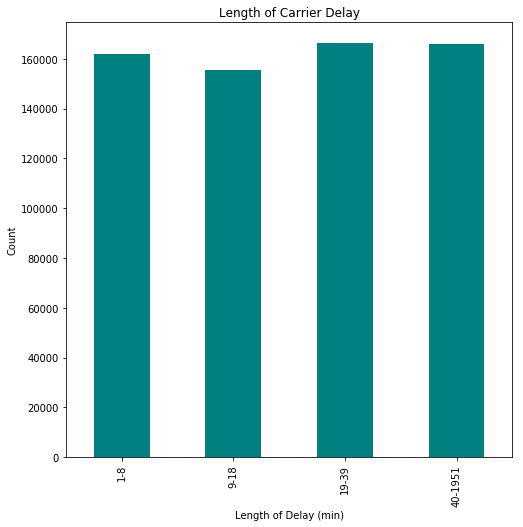

In [25]:
# Plot
df_cd_1['CDGroup'].value_counts(sort = False).plot(kind= 'bar', color = 'teal', figsize=(8,8))
plt.title("Length of Carrier Delay")
plt.ylabel("Count")
plt.xlabel("Length of Delay (min)")
plt.show();

>Carrier delays are most commonly 19-39 minutes long.

#### Length of Weather Delays

In [26]:
# Query 'WeatherDelay' to only select entries that are neither NaN or 0.
df_wd_1 = df_2008s.query('WeatherDelay != "NaN"')
df_wd_1 = df_wd_1.query('WeatherDelay != "0.0"')
df_wd_1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
10,2008,1,3,4,706.0,700,916.0,915,WN,100,...,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
12,2008,1,3,4,1426.0,1430,1426.0,1425,WN,829,...,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3


In [27]:
df_wd_1.describe().WeatherDelay

count    99985.000000
mean        46.344122
std         61.591248
min          1.000000
25%         11.000000
50%         25.000000
75%         57.000000
max       1352.000000
Name: WeatherDelay, dtype: float64

In [28]:
# Create bins of weather delay lengths using information from the cell above.
bin_edges = [1, 11, 25, 57, 1352]
bin_names = ['1-10', '11-24', '25-56', '57-1352']
df_wd_1['WDGroup'] = pd.cut(df_wd_1['WeatherDelay'], bin_edges, labels=bin_names)
df_wd_1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,WDGroup
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
10,2008,1,3,4,706.0,700,916.0,915,WN,100,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
12,2008,1,3,4,1426.0,1430,1426.0,1425,WN,829,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN


In [29]:
# value counts for each bin
df_wd_1['WDGroup'].value_counts()

11-24      25013
25-56      24816
57-1352    24790
1-10       23497
Name: WDGroup, dtype: int64

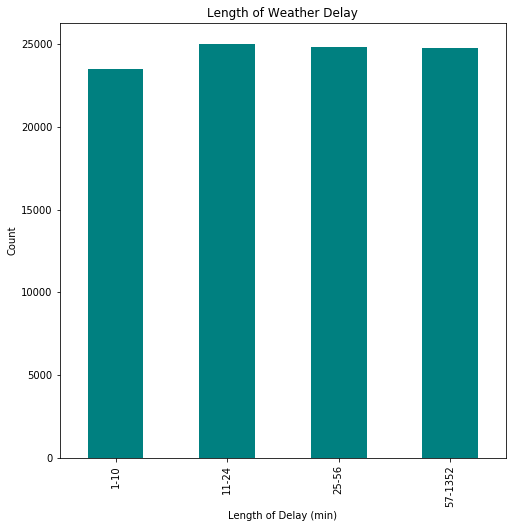

In [30]:
# Plot
df_wd_1['WDGroup'].value_counts(sort = False).plot(kind= 'bar', color = 'teal', figsize=(8,8))
plt.title("Length of Weather Delay")
plt.ylabel("Count")
plt.xlabel("Length of Delay (min)")
plt.show();

>Weather delays are most commonly 11-24 minutes long.

#### Length of NAS Delays

In [31]:
# Query 'NASDelay' to only select entries that are neither NaN or 0.
df_nd_1 = df_2008s.query('NASDelay != "NaN"')
df_nd_1 = df_nd_1.query('NASDelay != "0.0"')
df_nd_1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
10,2008,1,3,4,706.0,700,916.0,915,WN,100,...,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
12,2008,1,3,4,1426.0,1430,1426.0,1425,WN,829,...,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3


In [32]:
df_nd_1.describe().NASDelay

count    928031.000000
mean         28.201106
std          36.880101
min           1.000000
25%           8.000000
50%          18.000000
75%          31.000000
max        1357.000000
Name: NASDelay, dtype: float64

In [33]:
# Create bins for NAS delay length based on information on the cell above
bin_edges = [1, 8, 18, 31, 1357]
bin_names = ['1-7', '8-17', '18-30', '31-1357']
df_nd_1['NDGroup'] = pd.cut(df_nd_1['NASDelay'], bin_edges, labels=bin_names)
df_nd_1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,NDGroup
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
10,2008,1,3,4,706.0,700,916.0,915,WN,100,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
12,2008,1,3,4,1426.0,1430,1426.0,1425,WN,829,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN


In [34]:
# value counts for each bin
df_nd_1['NDGroup'].value_counts()

8-17       250920
31-1357    229166
18-30      213381
1-7        200499
Name: NDGroup, dtype: int64

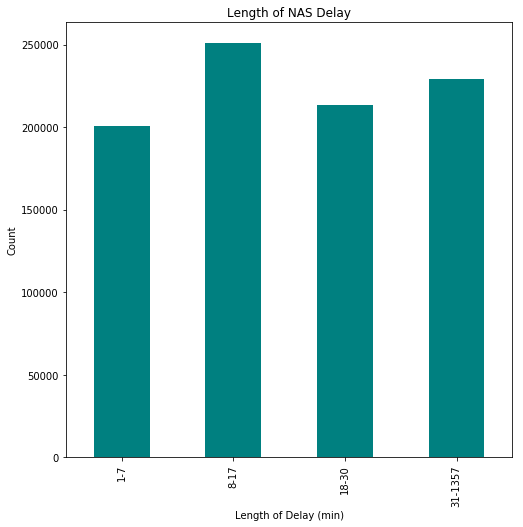

In [35]:
# Plot
df_nd_1['NDGroup'].value_counts(sort = False).plot(kind= 'bar', color = 'teal', figsize=(8,8))
plt.title("Length of NAS Delay")
plt.ylabel("Count")
plt.xlabel("Length of Delay (min)")
plt.show();

>NAS delays are most commonly 8-17 minutes long.

#### Length of Security Delays

In [36]:
# Query 'SecurityDelay' to only select entries that are neither NaN or 0.
df_sd_1 = df_2008s.query('SecurityDelay != "NaN"')
df_sd_1 = df_sd_1.query('SecurityDelay != "0.0"')
df_sd_1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
10,2008,1,3,4,706.0,700,916.0,915,WN,100,...,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
12,2008,1,3,4,1426.0,1430,1426.0,1425,WN,829,...,12.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3


In [37]:
df_sd_1.describe().SecurityDelay

count    6202.000000
mean       18.432119
std        22.185362
min         1.000000
25%         7.000000
50%        13.000000
75%        22.000000
max       392.000000
Name: SecurityDelay, dtype: float64

In [38]:
# Create bins of security delay lengths using information from the cell above.
bin_edges = [1, 7, 13, 22, 392]
bin_names = ['1-6', '7-12', '13-21', '22-392']
df_sd_1['SDGroup'] = pd.cut(df_sd_1['SecurityDelay'], bin_edges, labels=bin_names)
df_sd_1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,SDGroup
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
10,2008,1,3,4,706.0,700,916.0,915,WN,100,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
12,2008,1,3,4,1426.0,1430,1426.0,1425,WN,829,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN


In [39]:
# value counts for each bin
df_sd_1['SDGroup'].value_counts()

1-6       1630
13-21     1509
22-392    1443
7-12      1416
Name: SDGroup, dtype: int64

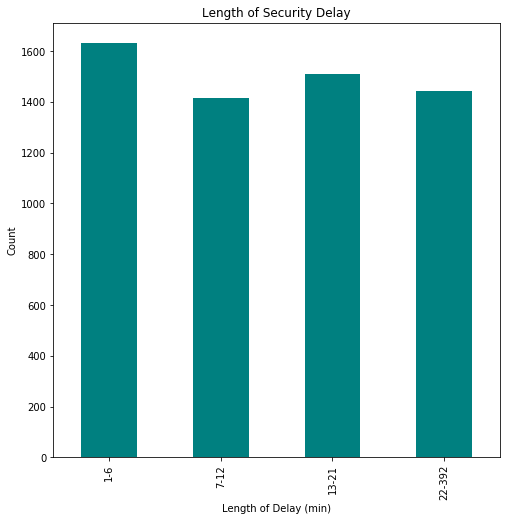

In [40]:
# Plot
df_sd_1['SDGroup'].value_counts(sort = False).plot(kind= 'bar', color = 'teal', figsize=(8,8))
plt.title("Length of Security Delay")
plt.ylabel("Count")
plt.xlabel("Length of Delay (min)")
plt.show();

>Security delays are most commonly 1-6 minutes long.

#### Length of Late Aircraft Delays

In [41]:
# Query 'LateAircraftDelay' to only select entries that are neither NaN or 0.
df_ld_1 = df_2008s.query('LateAircraftDelay != "NaN"')
df_ld_1 = df_ld_1.query('LateAircraftDelay != "0.0"')
df_ld_1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,TaxiOut,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,8.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,17.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,10.0,0,NaN,0,2.0,0.0,0.0,0.0,32.0,2008/1/3
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,10.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,7.0,0,NaN,0,10.0,0.0,0.0,0.0,47.0,2008/1/3
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,7.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,19.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,6.0,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3


In [42]:
df_ld_1.describe().LateAircraftDelay

count    699418.000000
mean         45.280851
std          47.436874
min           1.000000
25%          16.000000
50%          29.000000
75%          58.000000
max        1316.000000
Name: LateAircraftDelay, dtype: float64

In [43]:
# Create bins of late aircraft delay lengths using information from the cell above.
bin_edges = [1, 11, 25, 57, 1352]
bin_names = ['1-10', '11-24', '25-56', '57-1352']
df_ld_1['LDGroup'] = pd.cut(df_ld_1['LateAircraftDelay'], bin_edges, labels=bin_names)
df_ld_1

,Year,Month,DayofMonth,DayOfWeek,DepTime,CRSDepTime,ArrTime,CRSArrTime,UniqueCarrier,FlightNum,...,Cancelled,CancellationCode,Diverted,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay,Date,LDGroup
0,2008,1,3,4,2003.0,1955,2211.0,2225,WN,335,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
1,2008,1,3,4,754.0,735,1002.0,1000,WN,3231,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
2,2008,1,3,4,628.0,620,804.0,750,WN,448,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
3,2008,1,3,4,926.0,930,1054.0,1100,WN,1746,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
4,2008,1,3,4,1829.0,1755,1959.0,1925,WN,3920,...,0,NaN,0,2.0,0.0,0.0,0.0,32.0,2008/1/3,25-56
5,2008,1,3,4,1940.0,1915,2121.0,2110,WN,378,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
6,2008,1,3,4,1937.0,1830,2037.0,1940,WN,509,...,0,NaN,0,10.0,0.0,0.0,0.0,47.0,2008/1/3,25-56
7,2008,1,3,4,1039.0,1040,1132.0,1150,WN,535,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
8,2008,1,3,4,617.0,615,652.0,650,WN,11,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN
9,2008,1,3,4,1620.0,1620,1639.0,1655,WN,810,...,0,NaN,0,NaN,NaN,NaN,NaN,NaN,2008/1/3,NaN


In [44]:
# value counts for each bin
df_ld_1['LDGroup'].value_counts()

25-56      211870
11-24      201440
57-1352    176008
1-10       101935
Name: LDGroup, dtype: int64

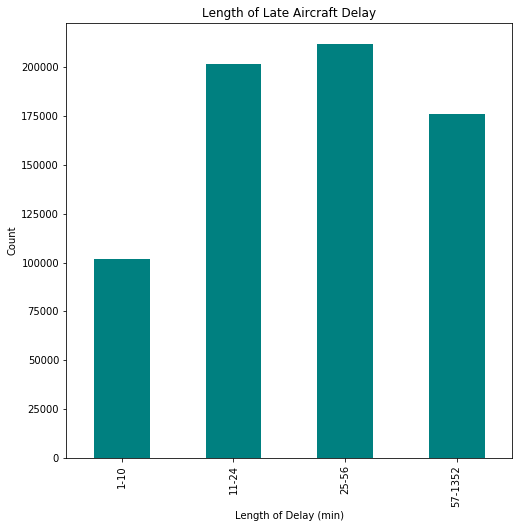

In [45]:
# Plot
df_ld_1['LDGroup'].value_counts(sort = False).plot(kind= 'bar', color = 'teal', figsize=(8,8))
plt.title("Length of Late Aircraft Delay")
plt.ylabel("Count")
plt.xlabel("Length of Delay (min)")
plt.show();

>Late aircraft delays are most commonly 25-56 minutes long.

#### Total Destinations

In [46]:
# create value counts data set for 'Dest' column
df_dest = df_2008s['Dest'].value_counts()
df_dest = df_dest.reset_index()

In [47]:
#df_dest.to_csv('dest.csv', index=False)

In [48]:
%%HTML 
<div class='tableauPlaceholder' id='viz1555730357000' style='position: relative'><noscript><a href='#'><img alt=' ' src='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;To&#47;TotalDomesticFlightsintheU_S_in2008&#47;Dashboard1&#47;1_rss.png' style='border: none' /></a></noscript><object class='tableauViz'  style='display:none;'><param name='host_url' value='https%3A%2F%2Fpublic.tableau.com%2F' /> <param name='embed_code_version' value='3' /> <param name='site_root' value='' /><param name='name' value='TotalDomesticFlightsintheU_S_in2008&#47;Dashboard1' /><param name='tabs' value='no' /><param name='toolbar' value='yes' /><param name='static_image' value='https:&#47;&#47;public.tableau.com&#47;static&#47;images&#47;To&#47;TotalDomesticFlightsintheU_S_in2008&#47;Dashboard1&#47;1.png' /> <param name='animate_transition' value='yes' /><param name='display_static_image' value='yes' /><param name='display_spinner' value='yes' /><param name='display_overlay' value='yes' /><param name='display_count' value='yes' /></object></div>                <script type='text/javascript'>                    var divElement = document.getElementById('viz1555730357000');                    var vizElement = divElement.getElementsByTagName('object')[0];                    vizElement.style.minWidth='420px';vizElement.style.maxWidth='1650px';vizElement.style.width='100%';vizElement.style.minHeight='587px';vizElement.style.maxHeight='887px';vizElement.style.height=(divElement.offsetWidth*0.75)+'px';                    var scriptElement = document.createElement('script');                    scriptElement.src = 'https://public.tableau.com/javascripts/api/viz_v1.js';                    vizElement.parentNode.insertBefore(scriptElement, vizElement);                </script>

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?
>#### Total Flights by Day of Year
Due to working with such a large data set, I initially used a sample of the data set (10,000 entries) to visualize my data. Doing this, I was unable to see an obvious pattern in the visualization of total flights by day of year. However, when I used the full data set, I was able to group the data into four sections of the year where the number of flights were similar. Using the full data set paints a clearer picture as to how flights are distributed throughout the year.

## Bivariate Exploration
#### Cancellation cf. Month

In [7]:
# average cancellations
df_2008s.Cancelled.mean()

0.019606181580797428

In [49]:
# average cancellations by month
df_cancelled_month = df_2008s.groupby(['Month'])['Cancelled'].mean()

In [50]:
# Convert to new data set
df_cancelled_month = df_cancelled_month.reset_index()

In [51]:
# convert numbered months to letter months
df_cancelled_month['Month'] = df_cancelled_month['Month'].apply(lambda x: calendar.month_abbr[x])

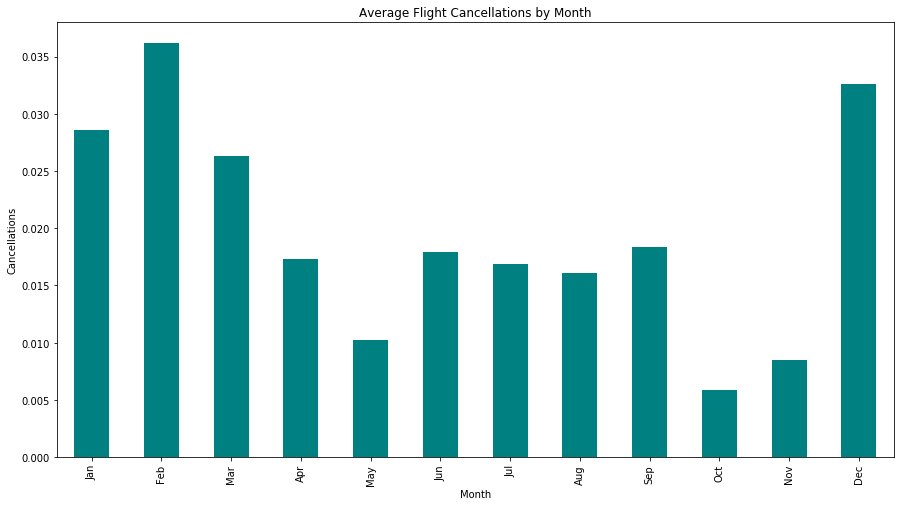

In [52]:
# plot
df_cancelled_month.plot(kind='bar', x='Month', y='Cancelled', color = 'teal', legend=False, figsize= (15,8))
plt.title("Average Flight Cancellations by Month")
plt.ylabel("Cancellations")
plt.xlabel("Month")
plt.show();

>Flights are most commonly cancelled in February. Flights are least commonly cancelled in October.

In [53]:
# sort values of monthly flight cancellations
df_cancelled_month.sort_values(['Cancelled'], ascending = False)

,Month,Cancelled
1,Feb,0.036182
11,Dec,0.032625
0,Jan,0.028572
2,Mar,0.026267
8,Sep,0.018327
5,Jun,0.017959
3,Apr,0.017312
6,Jul,0.016878
7,Aug,0.016063
4,May,0.010274


#### Delay cf. Month

In [54]:
# Average Carrier Delay in minutes
df_2008s.CarrierDelay.mean()

15.772063342154539

In [55]:
# Average carrier delay by month in minutes
df_cd_month = df_2008s.groupby(['Month'])['CarrierDelay'].mean()

In [56]:
# Convert to new data set
df_cd_month = df_cd_month.reset_index()

In [57]:
# Convert numbered months to lettered months
df_cd_month['Month'] = df_cd_month['Month'].apply(lambda x: calendar.month_abbr[x])

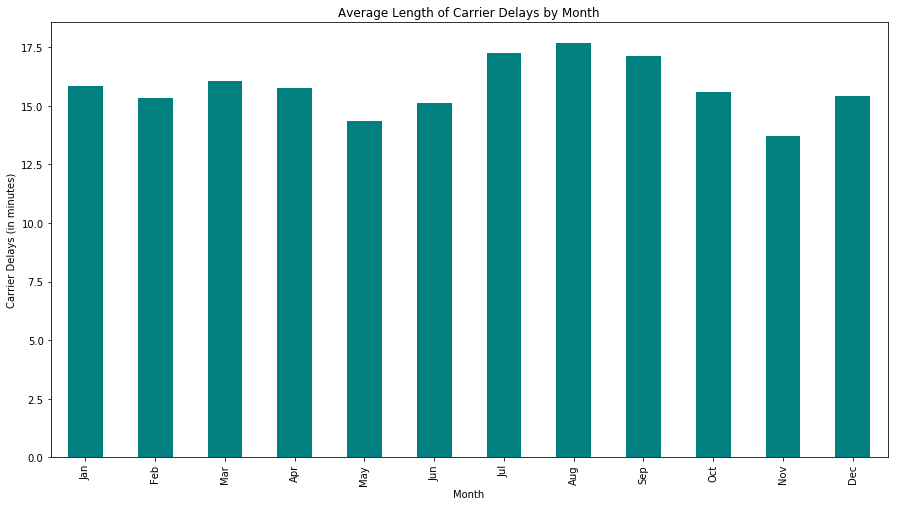

In [58]:
# Plot
df_cd_month.plot(kind='bar', x='Month', y='CarrierDelay', color = 'teal', legend=False, figsize= (15,8))
plt.title("Average Length of Carrier Delays by Month")
plt.ylabel("Carrier Delays (in minutes)")
plt.xlabel("Month")
plt.show();

>Flights experience carrier delays most commonly in August. Flights are least commonly delayed by carrier in November.

In [59]:
# sort average monthly carrier delays
df_cd_month.sort_values(['CarrierDelay'], ascending = False)

,Month,CarrierDelay
7,Aug,17.683983
6,Jul,17.258815
8,Sep,17.128674
2,Mar,16.063386
0,Jan,15.832279
3,Apr,15.771317
9,Oct,15.575364
11,Dec,15.422806
1,Feb,15.350372
5,Jun,15.111817


In [60]:
# Average Weather Delay in minutes
df_2008s.WeatherDelay.mean()

3.039031044738922

In [61]:
# average weather delay by month in minutes
df_wd_month = df_2008s.groupby(['Month'])['WeatherDelay'].mean()

In [62]:
# convert to new data set
df_wd_month = df_wd_month.reset_index()

In [63]:
# convert numbered months to lettered months
df_wd_month['Month'] = df_wd_month['Month'].apply(lambda x: calendar.month_abbr[x])

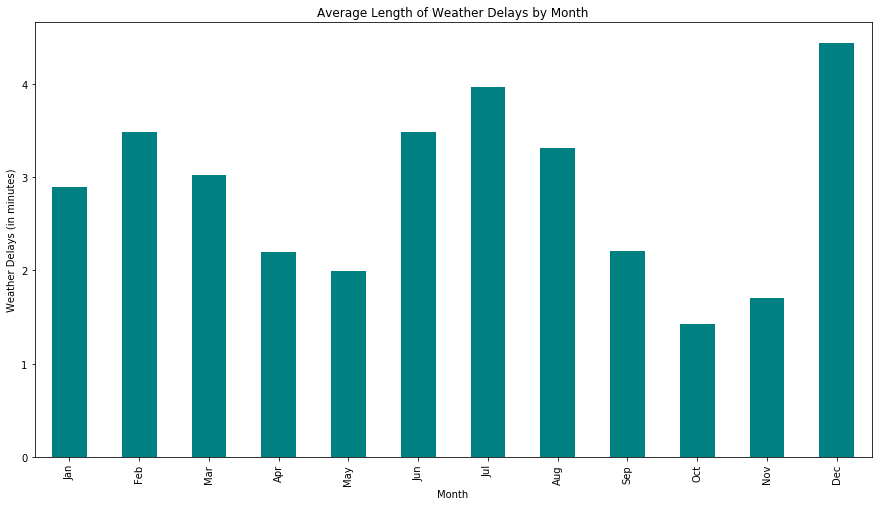

In [64]:
# plot
df_wd_month.plot(kind='bar', x='Month', y='WeatherDelay', color = 'teal', legend=False, figsize = (15,8))
plt.title("Average Length of Weather Delays by Month")
plt.ylabel("Weather Delays (in minutes)")
plt.xlabel("Month")
plt.show();

>Flights experience weather delays most commonly in December. Flights are least commonly delayed by weather in October.

In [65]:
# sort monthly average weather delays
df_wd_month.sort_values(['WeatherDelay'], ascending = False)

,Month,WeatherDelay
11,Dec,4.435057
6,Jul,3.968540
1,Feb,3.483976
5,Jun,3.481261
7,Aug,3.310945
2,Mar,3.016375
0,Jan,2.888493
8,Sep,2.207087
3,Apr,2.200280
4,May,1.998010


In [66]:
# Average NAS Delay in minutes
df_2008s.NASDelay.mean()

17.16462270492905

In [67]:
# average monthly NAS delays in minutes
df_nd_month = df_2008s.groupby(['Month'])['NASDelay'].mean()

In [68]:
# convert to new data set
df_nd_month = df_nd_month.reset_index()

In [69]:
# convert numbered months to lettered months
df_nd_month['Month'] = df_nd_month['Month'].apply(lambda x: calendar.month_abbr[x])

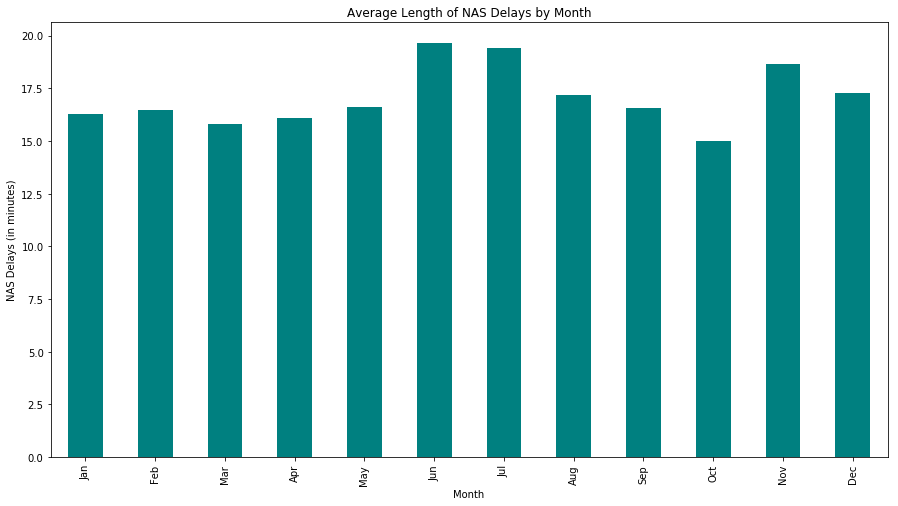

In [70]:
# plot
df_nd_month.plot(kind='bar', x='Month', y='NASDelay', color = 'teal', legend=False, figsize = (15,8))
plt.title("Average Length of NAS Delays by Month")
plt.ylabel("NAS Delays (in minutes)")
plt.xlabel("Month")
plt.show();

>Flights experience NAS delays most commonly in June. Flights are least commonly delayed by the NAS in October.


In [71]:
# sort average month NAS delays 
df_nd_month.sort_values(['NASDelay'], ascending = False)

,Month,NASDelay
5,Jun,19.645184
6,Jul,19.393338
10,Nov,18.650619
11,Dec,17.251395
7,Aug,17.170741
4,May,16.621472
8,Sep,16.549621
1,Feb,16.466292
0,Jan,16.277326
3,Apr,16.076132


In [72]:
# Average Security Delay in minutes
df_2008s.SecurityDelay.mean()

0.07497433980331009

In [73]:
# average monthly security delay in minutes
df_sd_month = df_2008s.groupby(['Month'])['SecurityDelay'].mean()

In [74]:
# convert to new data set. 
# convert numbered months to lettered months.
df_sd_month = df_sd_month.reset_index()
df_sd_month['Month'] = df_sd_month['Month'].apply(lambda x: calendar.month_abbr[x])

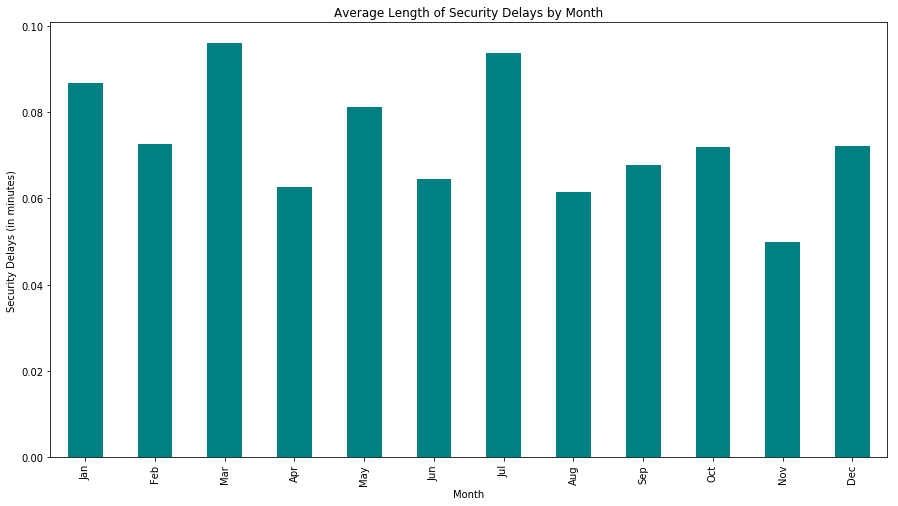

In [75]:
# plot
df_sd_month.plot(kind='bar', x='Month', y='SecurityDelay', color = 'teal', legend=False, figsize = (15,8))
plt.title("Average Length of Security Delays by Month")
plt.ylabel("Security Delays (in minutes)")
plt.xlabel("Month")
plt.show();

>Flights experience security delays most commonly in March. Flights are least commonly delayed by security in November.


In [76]:
# sort average monthly security delays.
df_sd_month.sort_values(['SecurityDelay'], ascending = False)

,Month,SecurityDelay
2,Mar,0.096060
6,Jul,0.093724
0,Jan,0.086770
4,May,0.081173
1,Feb,0.072716
11,Dec,0.072228
9,Oct,0.071888
8,Sep,0.067787
5,Jun,0.064617
3,Apr,0.062577


In [77]:
# Average Late Aircraft Delay in minutes
df_2008s.LateAircraftDelay.mean()

20.770981186894772

In [78]:
# average monthly late aircraft delays in minutes
df_ad_month = df_2008s.groupby(['Month'])['LateAircraftDelay'].mean()

In [79]:
# convert to new data set
# convert numbered months to lettered months
df_ad_month = df_ad_month.reset_index()
df_ad_month['Month'] = df_ad_month['Month'].apply(lambda x: calendar.month_abbr[x])

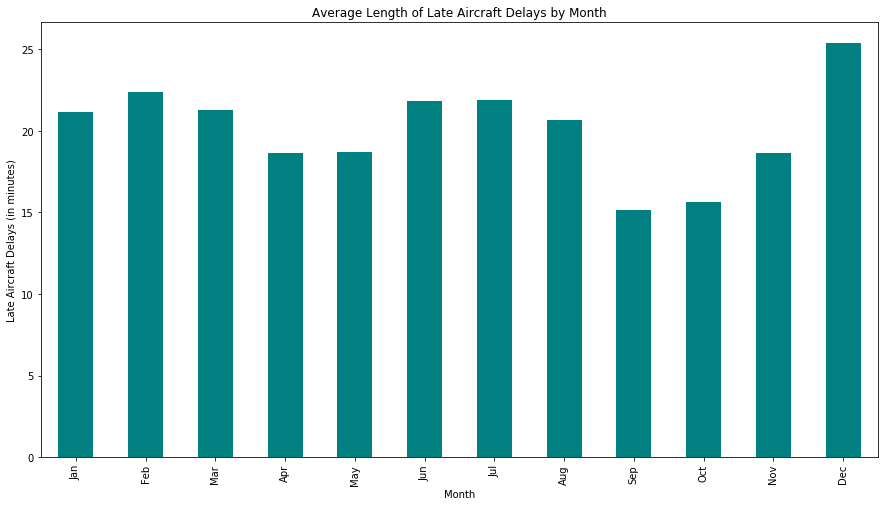

In [80]:
# plot
df_ad_month.plot(kind='bar', x='Month', y='LateAircraftDelay', color = 'teal', legend=False, figsize = (15,8))
plt.title("Average Length of Late Aircraft Delays by Month")
plt.ylabel("Late Aircraft Delays (in minutes)")
plt.xlabel("Month")
plt.show();

>Flights experience late aircraft delays most commonly in December. Flights are least commonly delayed by late aircrafts in September.

In [81]:
# sort average monthly late aircraft delays.
df_ad_month.sort_values(['LateAircraftDelay'], ascending = False)

,Month,LateAircraftDelay
11,Dec,25.373235
1,Feb,22.371679
6,Jul,21.869989
5,Jun,21.798618
2,Mar,21.250829
0,Jan,21.140054
7,Aug,20.670662
4,May,18.682583
3,Apr,18.640678
10,Nov,18.617331


#### Cancellations cf. Day of Week

In [82]:
# average cancellations by day of week in minutes
df_cancelled_weekday = df_2008s.groupby(['DayOfWeek'])['Cancelled'].mean()

In [83]:
# convert to data set.
# convert numbered days of week to lettered days of week
df_cancelled_weekday = df_cancelled_weekday.reset_index()
df_cancelled_weekday['DayOfWeek'] = df_cancelled_weekday['DayOfWeek'].apply(lambda x: calendar.day_abbr[x-1])

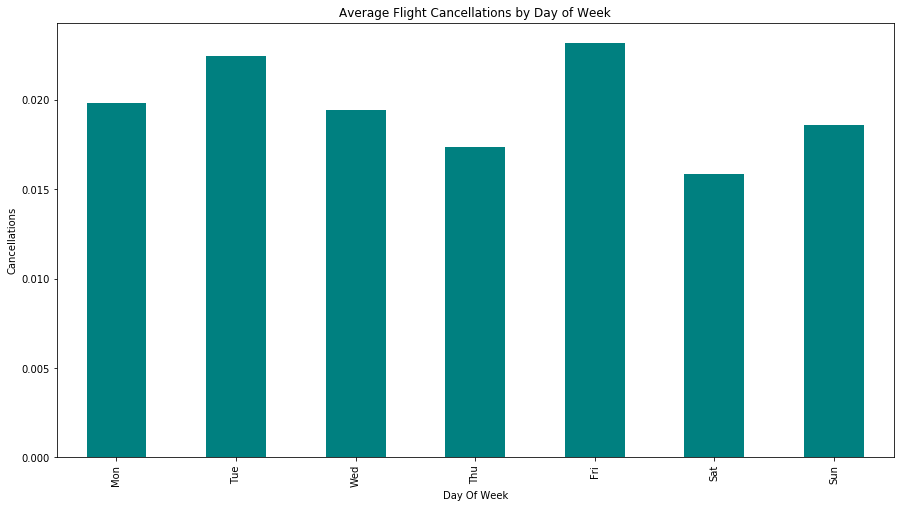

In [84]:
# plot
df_cancelled_weekday.plot(kind='bar', x='DayOfWeek', y='Cancelled', color = 'teal', legend=False, figsize = (15,8))
plt.title("Average Flight Cancellations by Day of Week")
plt.ylabel("Cancellations")
plt.xlabel("Day Of Week")
plt.show();

>Flights are most commonly cancelled on Fridays. Flights are least commonly cancelled on Saturdays.

In [85]:
# sort average weekly cancellations
df_cancelled_weekday.sort_values(['Cancelled'], ascending = False)

,DayOfWeek,Cancelled
4,Fri,0.023148
1,Tue,0.022449
0,Mon,0.019796
2,Wed,0.019431
6,Sun,0.018567
3,Thu,0.017326
5,Sat,0.015821


#### Delay cf. Day of Week

In [86]:
# Average Carrier Delay by Day of Week
df_cd_weekday = df_2008s.groupby(['DayOfWeek'])['CarrierDelay'].mean()

In [87]:
# convert to new data set
# convert numbered days of week to lettered days of week
df_cd_weekday = df_cd_weekday.reset_index()
df_cd_weekday['DayOfWeek'] = df_cd_weekday['DayOfWeek'].apply(lambda x: calendar.day_abbr[x-1])

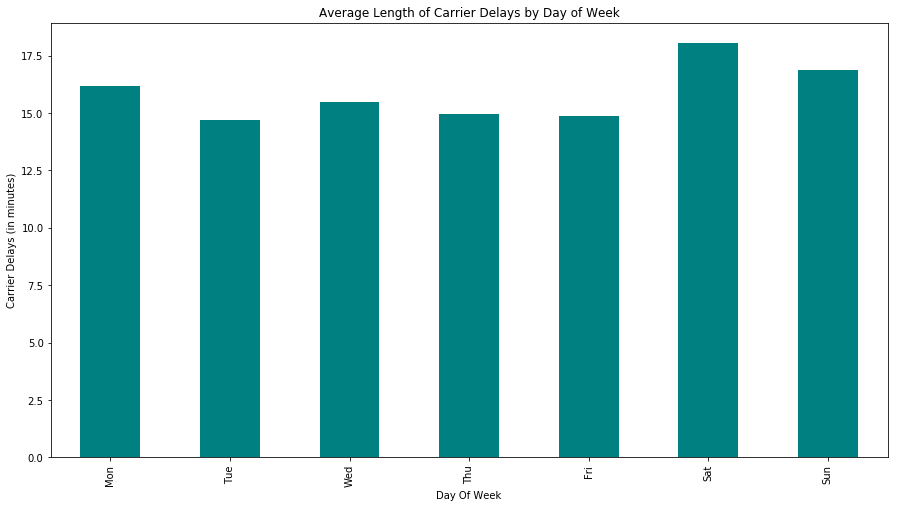

In [88]:
# plot
df_cd_weekday.plot(kind='bar', x='DayOfWeek', y='CarrierDelay', color = 'teal', legend=False, figsize = (15,8))
plt.title("Average Length of Carrier Delays by Day of Week")
plt.ylabel("Carrier Delays (in minutes)")
plt.xlabel("Day Of Week")
plt.show();

>Flights experience carrier delays most commonly on Saturdays. Flights are least commonly delayed by carrier on Tuesdays.

In [89]:
# sort average weekly cancellations
df_cd_weekday.sort_values(['CarrierDelay'], ascending = False)

,DayOfWeek,CarrierDelay
5,Sat,18.036749
6,Sun,16.861219
0,Mon,16.157803
2,Wed,15.487159
3,Thu,14.972852
4,Fri,14.849072
1,Tue,14.712985


In [90]:
#  Average weather delay by day of week
df_wd_weekday = df_2008s.groupby(['DayOfWeek'])['WeatherDelay'].mean()

In [91]:
# convert to data set
# convert numbered days of week to lettered days of week
df_wd_weekday = df_wd_weekday.reset_index()
df_wd_weekday['DayOfWeek'] = df_wd_weekday['DayOfWeek'].apply(lambda x: calendar.day_abbr[x-1])

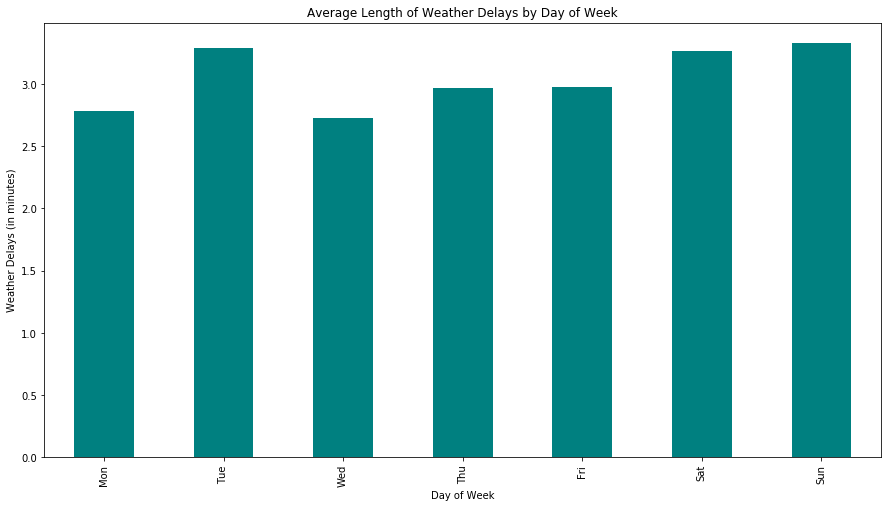

In [92]:
# plot
df_wd_weekday.plot(kind='bar', x='DayOfWeek', y='WeatherDelay', color = 'teal', legend=False, figsize = (15,8))
plt.title("Average Length of Weather Delays by Day of Week")
plt.ylabel("Weather Delays (in minutes)")
plt.xlabel("Day of Week")
plt.show();

>Flights experience weather delays most commonly on Sundays. Flights are least commonly delayed by weather on Wednesdays.

In [93]:
# sort average weekly weather delays
df_wd_weekday.sort_values(['WeatherDelay'], ascending = False)

,DayOfWeek,WeatherDelay
6,Sun,3.327466
1,Tue,3.289519
5,Sat,3.261389
4,Fri,2.979664
3,Thu,2.967430
0,Mon,2.786340
2,Wed,2.724761


In [94]:
# Average NAS delays by day of week
df_nd_weekday = df_2008s.groupby(['DayOfWeek'])['NASDelay'].mean()

In [95]:
# convert to data set
# convert numbered days of week to lettered days of week
df_nd_weekday = df_nd_weekday.reset_index()
df_nd_weekday['DayOfWeek'] = df_nd_weekday['DayOfWeek'].apply(lambda x: calendar.day_abbr[x-1])

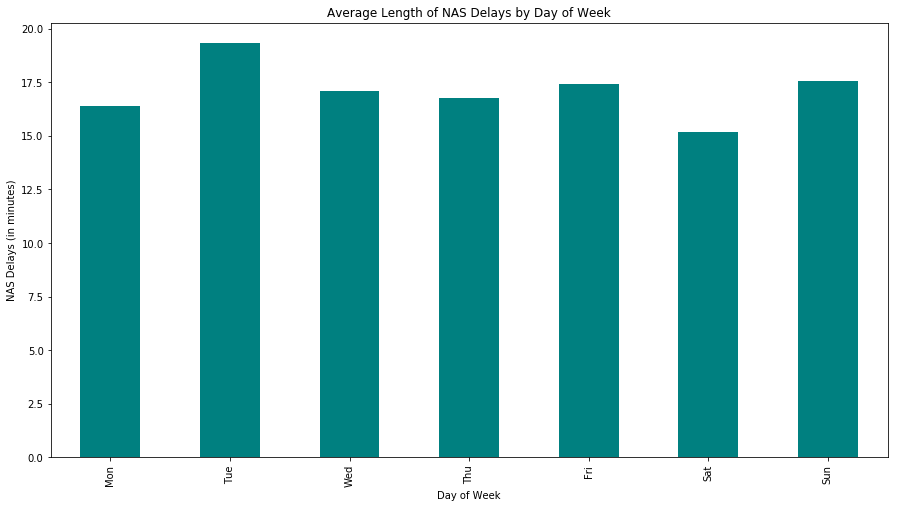

In [96]:
# plot
df_nd_weekday.plot(kind='bar', x='DayOfWeek', y='NASDelay', color = 'teal', legend=False, figsize = (15,8))
plt.title("Average Length of NAS Delays by Day of Week")
plt.ylabel("NAS Delays (in minutes)")
plt.xlabel("Day of Week")
plt.show();

>Flights experience NAS delays most commonly on Tuesdays. Flights are least commonly delayed by the NAS on Saturdays.

In [97]:
# sort average weekly NAS delays 
df_nd_weekday.sort_values(['NASDelay'], ascending = False)

,DayOfWeek,NASDelay
1,Tue,19.315483
6,Sun,17.572055
4,Fri,17.432522
2,Wed,17.096415
3,Thu,16.780733
0,Mon,16.372329
5,Sat,15.160003


In [98]:
# average security delays by day of week
df_sd_weekday = df_2008s.groupby(['DayOfWeek'])['SecurityDelay'].mean()

In [99]:
# convert to data set
# convert numbered days of week to lettered days of week
df_sd_weekday = df_sd_weekday.reset_index()
df_sd_weekday['DayOfWeek'] = df_sd_weekday['DayOfWeek'].apply(lambda x: calendar.day_abbr[x-1])

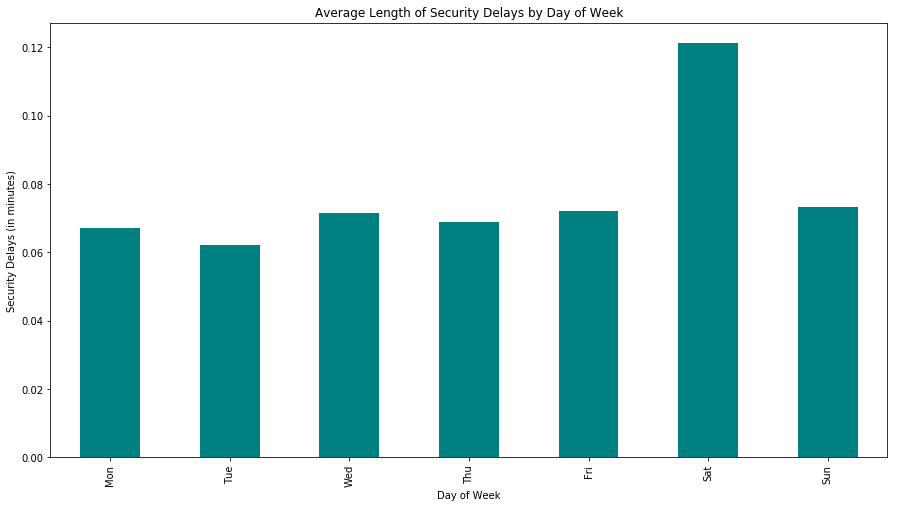

In [100]:
# plot
df_sd_weekday.plot(kind='bar', x='DayOfWeek', y='SecurityDelay', color = 'teal', legend=False, figsize = (15,8))
plt.title("Average Length of Security Delays by Day of Week")
plt.ylabel("Security Delays (in minutes)")
plt.xlabel("Day of Week")
plt.show();

>Flights experience security delays most commonly on Saturdays. Flights are least commonly delayed by security on Tuesdays.

In [101]:
# sort average weekly security delays.
df_sd_weekday.sort_values(['SecurityDelay'], ascending = False)

,DayOfWeek,SecurityDelay
5,Sat,0.121157
6,Sun,0.073222
4,Fri,0.072086
2,Wed,0.071392
3,Thu,0.069008
0,Mon,0.067232
1,Tue,0.062053


In [102]:
# average late aircraft carrier delays by day of week
df_ld_weekday = df_2008s.groupby(['DayOfWeek'])['LateAircraftDelay'].mean()

In [103]:
# convert to data set
# convert numbered days of week to lettered days of week
df_ld_weekday = df_ld_weekday.reset_index()
df_ld_weekday['DayOfWeek'] = df_ld_weekday['DayOfWeek'].apply(lambda x: calendar.day_abbr[x-1])

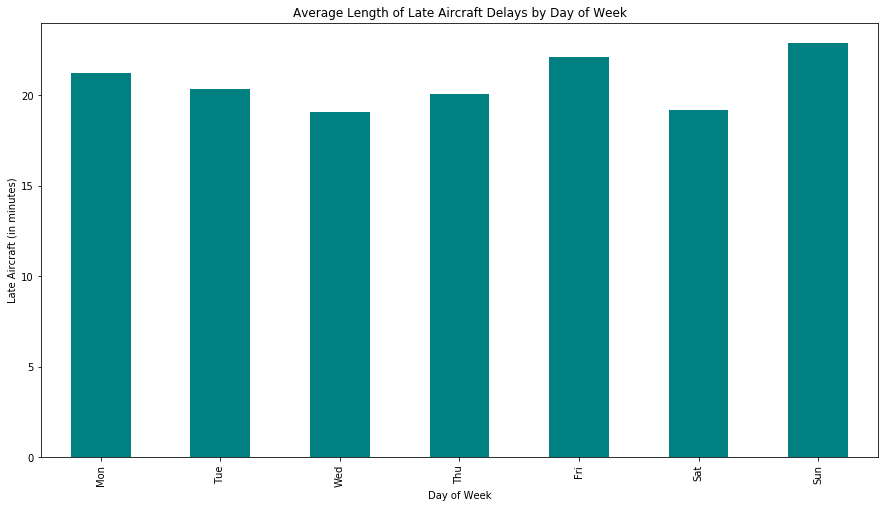

In [104]:
# plot
df_ld_weekday.plot(kind='bar', x='DayOfWeek', y='LateAircraftDelay', color = 'teal', legend=False, figsize = (15,8))
plt.title("Average Length of Late Aircraft Delays by Day of Week")
plt.ylabel("Late Aircraft (in minutes)")
plt.xlabel("Day of Week")
plt.show();

>Flights experience late aircraft delays most commonly on Sundays. Flights are least commonly delayed by late aircraft carriers on Wednesdays.


In [105]:
# sort average weekly late aircraft delays.
df_ld_weekday.sort_values(['LateAircraftDelay'], ascending = False)

,DayOfWeek,LateAircraftDelay
6,Sun,22.847294
4,Fri,22.068466
0,Mon,21.213501
1,Tue,20.315999
3,Thu,20.060478
5,Sat,19.164582
2,Wed,19.037666


# Multivariate Exploration
#### Types of Cancellations by Month

In [106]:
# average cancellations by month and cancellations code
df_cancelled_mv1 = df_2008s.groupby(['Month', 'CancellationCode'])['Cancelled'].count()

In [107]:
# convert to data set
# convert numbered months to lettered months
df_cancelled_mv1 = df_cancelled_mv1.reset_index()
df_cancelled_mv1['Month'] = df_cancelled_mv1['Month'].apply(lambda x: calendar.month_abbr[x])

In [108]:
df_cancelled_mv1

,Month,CancellationCode,Cancelled
0,Jan,NAS,3962
1,Jan,carrier,6635
2,Jan,weather,6711
3,Feb,NAS,4470
4,Feb,carrier,6090
5,Feb,security,2
6,Feb,weather,10034
7,Mar,NAS,2621
8,Mar,carrier,6038
9,Mar,security,4


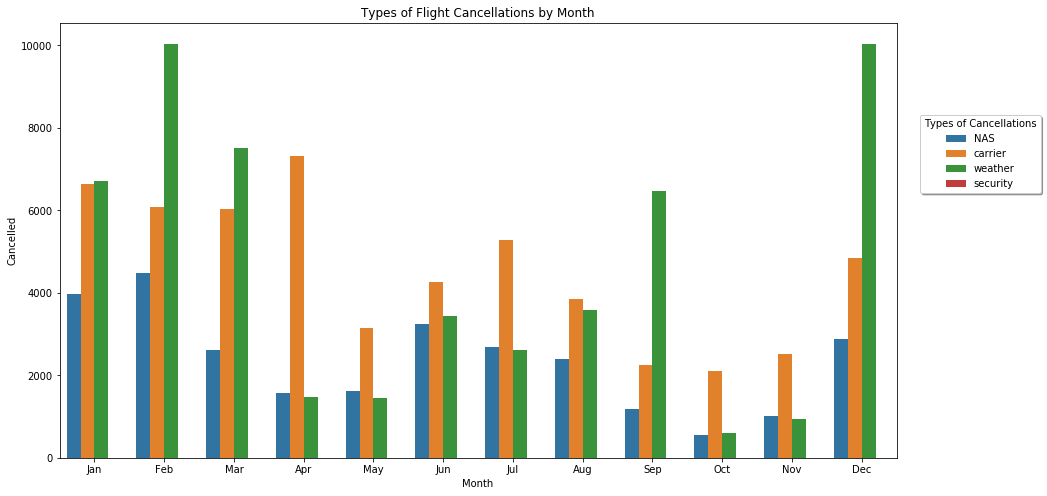

In [109]:
# plot
plt.figure(figsize=(15,8))
ax = sb.barplot(data = df_cancelled_mv1, x = 'Month', y = 'Cancelled', hue = 'CancellationCode')
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1, title = 'Types of Cancellations')
ax.set_title('Types of Flight Cancellations by Month');

>Carrier is the most common monthly cause for flight cancellations, followed by weather. Security cancellations are the least common cause for cancellations for all months.

#### Length of Delays by Month

In [110]:
# Drop NaN's from 'CarrierDelay'
# Exclude 0 entries from 'CarrierDelay'
# Group 'CarrierDelay' by month and find the average
df_delay_carrier_0 = df_2008s.dropna(subset=['CarrierDelay'])
df_delay_carrier_0 = df_delay_carrier_0[df_delay_carrier_0['CarrierDelay']!=0]
df_delay_carrier_1 = df_delay_carrier_0.groupby(['Month'])['CarrierDelay'].mean()


In [111]:
# convert to data set
df_delay_carrier_1 = df_delay_carrier_1.reset_index()
df_delay_carrier_1

,Month,CarrierDelay
0,1,36.079481
1,2,36.285589
2,3,34.910855
3,4,35.108070
4,5,33.535753
5,6,35.793324
6,7,39.506669
7,8,38.772434
8,9,39.542116
9,10,34.557236


In [112]:
# Drop NaN's from 'WeatherDelay'
# Exclude 0 entries from 'WeatherDelay'
# Group 'WeatherDelay' by month and find the average
df_delay_weather_0 = df_2008s.dropna(subset=['WeatherDelay'])
df_delay_weather_0 = df_delay_weather_0[df_delay_weather_0['WeatherDelay']!=0]
df_delay_weather_1 = df_delay_weather_0.groupby(['Month'])['WeatherDelay'].mean()

In [113]:
# convert to data set
df_delay_weather_1 = df_delay_weather_1.reset_index()
df_delay_weather_1

,Month,WeatherDelay
0,1,43.981173
1,2,44.660814
2,3,46.547068
3,4,48.953925
4,5,41.997025
5,6,47.672530
6,7,55.242421
7,8,46.223175
8,9,50.443945
9,10,42.444265


In [114]:
# Drop NaN's from 'NASDelay'
# Exclude 0 entries from 'NASDelay'
# Group 'NASDelay' by month and find the average
df_delay_NAS_0 = df_2008s.dropna(subset=['NASDelay'])
df_delay_NAS_0 = df_delay_NAS_0[df_delay_NAS_0['NASDelay']!=0]
df_delay_NAS_1 = df_delay_NAS_0.groupby(['Month'])['NASDelay'].mean()

In [115]:
# convert to data set
df_delay_NAS_1 = df_delay_NAS_1.reset_index()
df_delay_NAS_1

,Month,NASDelay
0,1,28.103122
1,2,27.781133
2,3,26.868463
3,4,25.086923
4,5,26.008819
5,6,30.752175
6,7,33.147465
7,8,30.155358
8,9,27.562945
9,10,24.703283


In [116]:
# Drop NaN's from 'SecurityDelay'
# Exclude 0 entries from 'SecurityDelay'
# Group 'SecurityDelay' by month and find the average
df_delay_security_0 = df_2008s.dropna(subset=['SecurityDelay'])
df_delay_security_0 = df_delay_security_0[df_delay_security_0['SecurityDelay']!=0]
df_delay_security_1 = df_delay_security_0.groupby(['Month'])['SecurityDelay'].mean()

In [117]:
# convert to data set
df_delay_security_1 = df_delay_security_1.reset_index()
df_delay_security_1

,Month,SecurityDelay
0,1,16.790637
1,2,17.863208
2,3,17.435986
3,4,16.060924
4,5,19.859470
5,6,17.959391
6,7,25.193858
7,8,19.613757
8,9,23.995025
9,10,18.609155


In [118]:
# Drop NaN's from 'LateAircraftDelay'
# Exclude 0 entries from 'LateAircraftDelay'
# Group 'LateAircraftDelay' by month and find the average
df_delay_aircraft_0 = df_2008s.dropna(subset=['LateAircraftDelay'])
df_delay_aircraft_0 = df_delay_aircraft_0[df_delay_aircraft_0['LateAircraftDelay']!=0]
df_delay_aircraft_1 = df_delay_aircraft_0.groupby(['Month'])['LateAircraftDelay'].mean()

In [119]:
# convert to data set
df_delay_aircraft_1 = df_delay_aircraft_1.reset_index()
df_delay_aircraft_1

,Month,LateAircraftDelay
0,1,44.958454
1,2,46.445871
2,3,44.368066
3,4,41.672394
4,5,41.488224
5,6,46.627787
6,7,49.339412
7,8,47.136730
8,9,40.664865
9,10,38.177968


In [120]:
# merge 
df_delay = pd.merge(df_delay_carrier_1, df_delay_weather_1, on='Month', how='outer')

In [121]:
# merge
df_delay = pd.merge(df_delay, df_delay_NAS_1, on='Month', how='outer')

In [122]:
# merge
df_delay = pd.merge(df_delay, df_delay_security_1, on='Month', how='outer')

In [123]:
# merge
df_delay = pd.merge(df_delay, df_delay_aircraft_1, on='Month', how='outer')

In [124]:
# convert numbered months to lettered months
df_delay['Month'] = df_delay['Month'].apply(lambda x: calendar.month_abbr[x])
df_delay

,Month,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,Jan,36.079481,43.981173,28.103122,16.790637,44.958454
1,Feb,36.285589,44.660814,27.781133,17.863208,46.445871
2,Mar,34.910855,46.547068,26.868463,17.435986,44.368066
3,Apr,35.108070,48.953925,25.086923,16.060924,41.672394
4,May,33.535753,41.997025,26.008819,19.859470,41.488224
5,Jun,35.793324,47.672530,30.752175,17.959391,46.627787
6,Jul,39.506669,55.242421,33.147465,25.193858,49.339412
7,Aug,38.772434,46.223175,30.155358,19.613757,47.136730
8,Sep,39.542116,50.443945,27.562945,23.995025,40.664865
9,Oct,34.557236,42.444265,24.703283,18.609155,38.177968


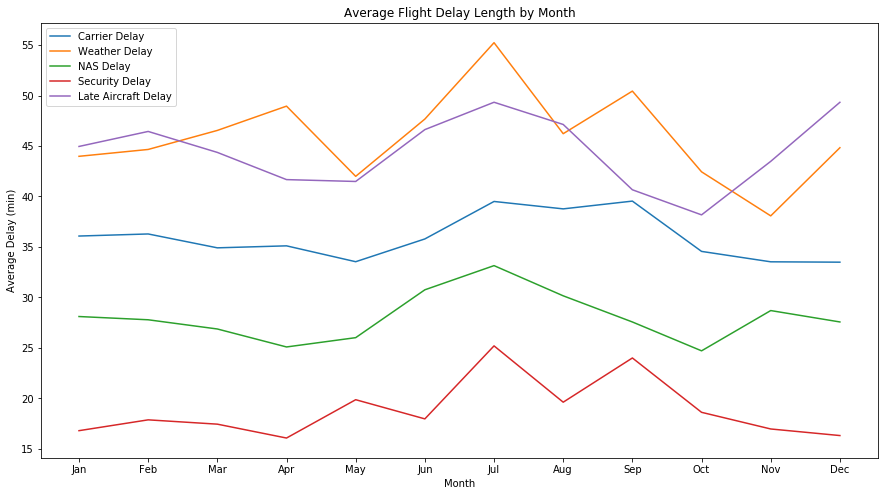

In [125]:
# plot 
ax = df_delay.plot(x="Month", y=["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"], kind="line", title='Average Flight Delay Length by Month', figsize=(15,8))
plt.xticks(range(0,12),df_delay["Month"])
leg = plt.legend().get_texts()
leg[0].set_text('Carrier Delay')
leg[1].set_text('Weather Delay')
leg[2].set_text('NAS Delay')
leg[3].set_text('Security Delay')
leg[4].set_text('Late Aircraft Delay')
ax.set_ylabel('Average Delay (min)');

>Weather and late carrier delays have the longest average duration of delay of total monthly flights amd security has the shortest duration of delay of total monthly flights.

#### Percentage of Flights Delayed by Month

In [126]:
# calculate percentage of flight delayed by month
df_delay2 = df_delay.copy()
df_delay3 = df_delay2[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]].div(df_flights_by_month.Total_Flights, axis=0)
df_delay3.insert(0, "Month", df_delay2["Month"], True)
df_delay3

,Month,CarrierDelay,WeatherDelay,NASDelay,SecurityDelay,LateAircraftDelay
0,Jan,0.000060,0.000073,0.000046,0.000028,0.000074
1,Feb,0.000064,0.000078,0.000049,0.000031,0.000082
2,Mar,0.000057,0.000076,0.000044,0.000028,0.000072
3,Apr,0.000059,0.000082,0.000042,0.000027,0.000070
4,May,0.000055,0.000069,0.000043,0.000033,0.000068
5,Jun,0.000059,0.000078,0.000051,0.000030,0.000077
6,Jul,0.000063,0.000088,0.000053,0.000040,0.000079
7,Aug,0.000063,0.000075,0.000049,0.000032,0.000077
8,Sep,0.000073,0.000093,0.000051,0.000044,0.000075
9,Oct,0.000062,0.000076,0.000044,0.000033,0.000069


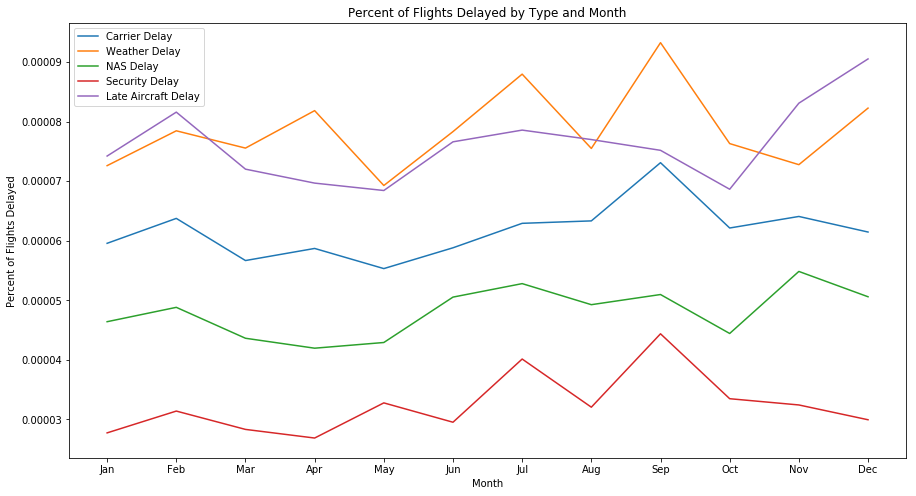

In [128]:
# plot
ax = df_delay3.plot(x="Month", y=["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"], kind="line", title='Percent of Flights Delayed by Type and Month', figsize=(15,8))
plt.xticks(range(0,12),df_delay["Month"])
leg = plt.legend().get_texts()
leg[0].set_text('Carrier Delay')
leg[1].set_text('Weather Delay')
leg[2].set_text('NAS Delay')
leg[3].set_text('Security Delay')
leg[4].set_text('Late Aircraft Delay')
ax.set_ylabel('Percent of Flights Delayed');

>Results were similar to that of types of delays by month where weather and late carrier delays have the highest percentage of delays of total monthly flights and security has the least percentage of delays of total monthly flights.

#### Types of Cancellations by Day of Week

In [129]:
# count cancellations by day of week and cancellation code
df_cancelled_mv = df_2008s.groupby(['DayOfWeek', 'CancellationCode'])['Cancelled'].count()

In [130]:
# convert to data set
# convert numbered day of week to lettered day of week
df_cancelled_mv = df_cancelled_mv.reset_index()
df_cancelled_mv['DayOfWeek'] = df_cancelled_mv['DayOfWeek'].apply(lambda x: calendar.day_abbr[x-1])

In [131]:
df_cancelled_mv

,DayOfWeek,CancellationCode,Cancelled
0,Mon,NAS,5061
1,Mon,carrier,8198
2,Mon,weather,7254
3,Tue,NAS,5099
4,Tue,carrier,8622
5,Tue,security,2
6,Tue,weather,9445
7,Wed,NAS,3530
8,Wed,carrier,9696
9,Wed,security,4


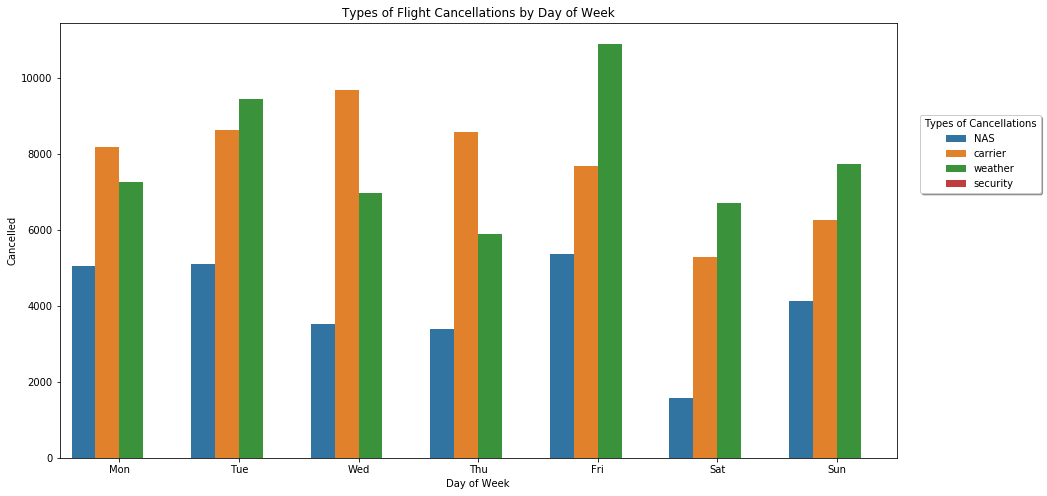

In [132]:
# plot
plt.figure(figsize=(15,8))
ax = sb.barplot(data = df_cancelled_mv, x = 'DayOfWeek', y = 'Cancelled', hue = 'CancellationCode')
ax.legend(loc='upper center', bbox_to_anchor=(1.1, 0.8), shadow=True, ncol=1, title = 'Types of Cancellations')
ax.set_title('Types of Flight Cancellations by Day of Week')
ax.set_xlabel('Day of Week');

>Weather is the most common weekly cause for flight cancellations, followed by carrier. Security cancellations are the least common cause for cancellations for all days of the week.

#### Average Length of Delays by Day of Week

In [133]:
# Drop NaN's from 'CarrierDelay'
# Exclude 0 entries from 'CarrierDelay'
# Group 'CarrierDelay' by day of week and find the average
df_delay_car_0 = df_2008s.dropna(subset=['CarrierDelay'])
df_delay_car_0 = df_delay_car_0[df_delay_car_0['CarrierDelay']!=0]
df_delay_car_1 = df_delay_car_0.groupby(['DayOfWeek'])['CarrierDelay'].mean()

In [134]:
# convert to data set
df_delay_car_1 = df_delay_car_1.reset_index()
df_delay_car_1

,DayOfWeek,CarrierDelay
0,1,36.890100
1,2,36.809477
2,3,36.169738
3,4,33.775200
4,5,33.727510
5,6,38.063226
6,7,36.539564


In [135]:
# Drop NaN's from 'WeatherDelay'
# Exclude 0 entries from 'WeatherDelay'
# Group 'WeatherDelay' by day of week and find the average
df_delay_wea_0 = df_2008s.dropna(subset=['WeatherDelay'])
df_delay_wea_0 = df_delay_wea_0[df_delay_wea_0['WeatherDelay']!=0]
df_delay_wea_1 = df_delay_wea_0.groupby(['DayOfWeek'])['WeatherDelay'].mean()

In [136]:
# convert to data set
df_delay_wea_1 = df_delay_wea_1.reset_index()
df_delay_wea_1

,DayOfWeek,WeatherDelay
0,1,45.358774
1,2,46.258028
2,3,44.155056
3,4,44.414658
4,5,44.963329
5,6,47.859740
6,7,51.938998


In [137]:
# Drop NaN's from 'NASDelay'
# Exclude 0 entries from 'NASDelay'
# Group 'NASDelay' by day of week and find the average
df_delay_NAS1_0 = df_2008s.dropna(subset=['NASDelay'])
df_delay_NAS1_0 = df_delay_NAS1_0[df_delay_NAS1_0['NASDelay']!=0]
df_delay_NAS1_1 = df_delay_NAS1_0.groupby(['DayOfWeek'])['NASDelay'].mean()

In [138]:
# convert to data set
df_delay_NAS1_1 = df_delay_NAS1_1.reset_index()
df_delay_NAS1_1

,DayOfWeek,NASDelay
0,1,27.436558
1,2,30.552165
2,3,27.672771
3,4,27.040529
4,5,28.359710
5,6,26.059475
6,7,29.766140


In [ ]:
# Drop NaN's from 'SecurityDelay'
# Exclude 0 entries from 'SecurityDelay'
# Group 'SecurityDelay' by day of week and find the average
df_delay_sec_0 = df_2008s.dropna(subset=['SecurityDelay'])
df_delay_sec_0 = df_delay_sec_0[df_delay_sec_0['SecurityDelay']!=0]
df_delay_sec_1 = df_delay_sec_0.groupby(['DayOfWeek'])['SecurityDelay'].mean()

In [ ]:
# convert to data set
df_delay_sec_1 = df_delay_sec_1.reset_index()
df_delay_sec_1

In [ ]:
# Drop NaN's from 'LateAircraftDelay'
# Exclude 0 entries from 'LateAircraftDelay'
# Group 'LateAircraftDelay' by day of week and find the average
df_delay_air_0 = df_2008s.dropna(subset=['LateAircraftDelay'])
df_delay_air_0 = df_delay_air_0[df_delay_air_0['LateAircraftDelay']!=0]
df_delay_air_1 = df_delay_air_0.groupby(['DayOfWeek'])['LateAircraftDelay'].mean()

In [ ]:
# convert to data set
df_delay_air_1 = df_delay_air_1.reset_index()
df_delay_air_1

In [ ]:
# merge
df_delay1 = pd.merge(df_delay_car_1, df_delay_wea_1, on='DayOfWeek', how='outer')
df_delay1

In [ ]:
# merge
df_delay1 = pd.merge(df_delay1, df_delay_NAS1_1, on='DayOfWeek', how='outer')

In [ ]:
# merge
df_delay1 = pd.merge(df_delay1, df_delay_sec_1, on='DayOfWeek', how='outer')

In [ ]:
# merge
df_delay1 = pd.merge(df_delay1, df_delay_air_1, on='DayOfWeek', how='outer')

In [ ]:
# convert numbered days of week to lettered days of week
df_delay1['DayOfWeek'] = df_delay1['DayOfWeek'].apply(lambda x: calendar.day_abbr[x-1])

In [ ]:
# plot
ax = df_delay1.plot(x="DayOfWeek", y=["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"], kind="line", title='Average Flight Delay Length by Day Of Week', figsize=(15,8))
plt.xticks(range(0,7),df_delay1["DayOfWeek"])
leg = plt.legend().get_texts()
leg[0].set_text('Carrier Delay')
leg[1].set_text('Weather Delay')
leg[2].set_text('NAS Delay')
leg[3].set_text('Security Delay')
leg[4].set_text('Late Aircraft Delay')
ax.set_ylabel('Average Delay (min)')
ax.set_xlabel('Day of Week');

>Weather and late carrier delays had the longest average delay length. Security delays had the shortest average delay length for all days of the week.

#### Percentage of Flights Delayed by Day of Week

In [ ]:
# Calculate percent of flights delayed by day of week
df_delayw = df_delay1.copy()
df_delayw1 = df_delayw[["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"]].div(df_day_value_counts.Total_Flights, axis=0)
df_delayw1.insert(0, "DayOfWeek", df_delay1["DayOfWeek"], True)
df_delayw1

In [ ]:
# plot
ax = df_delayw1.plot(x="DayOfWeek", y=["CarrierDelay", "WeatherDelay", "NASDelay", "SecurityDelay", "LateAircraftDelay"], kind="line", title='Percent of Flights Delayed by Type and Day of Week', figsize=(15,8))
plt.xticks(range(0,7),df_delayw1["DayOfWeek"])
leg = plt.legend().get_texts()
leg[0].set_text('Carrier Delay')
leg[1].set_text('Weather Delay')
leg[2].set_text('NAS Delay')
leg[3].set_text('Security Delay')
leg[4].set_text('Late Aircraft Delay')
ax.set_ylabel('Percent of Flights Delayed')
ax.set_xlabel('Day of Week');

>Results were similar to that of types of delays by week where weather and late carrier delays have the highest percentage of delays of total weekly flights and security has the least percentage of delays of total weekly flights.


### Were there any interesting or surprising interactions between features?

> Security delays and cancellations are very infrequent compared with the other types of delays and cancellations.